# Mixing Scala and Python on the same Notebook

Python has a rich ecosystem of modules including plotting with Matplotlib, data structure and analysis with Pandas, Machine Learning or Natural Language Processing. However, data scientists working with Spark may occasionaly need to call out code written in Scala or Java, for example one of the hundreds of libraries available on spark-packages.org. Unfortunately, Jupyter Python notebooks do not currently provide a way to call out Scala or Java code. As a result, a typical workaround is to first use a Scala notebook to run the Scala code, persist the output somewhere like a Hadoop Distributed File System, create another Python notebook, and re-load the data. This is obviously inefficent and awkward.

As we'll see in this Notebook, PixieDust provides a solution to this problem by letting users directly write and run scala code in its own cell. It also lets variables be shared between Python and Scala and vice-versa.

# We'll start by defining a few simple variables in Python

In [1]:
pythonString = "Hello From Python"
pythonInt = 20

# Import pixiedust module

In [3]:
import pixiedust

Pixiedust database opened successfully


# Use the python variable in Scala code
PixieDust makes all variables defined in the Python scope available to Scala using the following rules:
* Primitive types are mapped to the Scala equivalent e.g. Python Strings become Scala Strings, Python Integer become Scala Integer, etc...
* Some complex types are mapped as follow: PySpark SQLContext, DataFrame, RDD are mapped to their Scala Spark equivalent. Python GraphFrames are mapped to their Scala equivalent. We are planning to add more mapping as needed.
* Python classes are currently not converted and therefore cannot be used in Scala

`Prerequisite: PixieDust Scala Bridge requires the environment variable SCALA_HOME to be defined and pointing at a Scala install`

In [4]:
%%scala
print(pythonString)
print(pythonInt + 10)

Hello From Python
30


# Define a variable in Scala and use it in Python
In this section, we are going to create a Spark Dataframe in Scala and use it in Python with the PixieDust display method.

Note: only variable that are prefixed with __ will be available for use in Python

In [14]:
%%scala
//Reuse the sqlContext object available in the python scope
val c = sqlContext.asInstanceOf[org.apache.spark.sql.SQLContext]
import c.implicits._

val __dfFromScala = Seq(
(2010, "Camping Equipment", 3, 200),
(2010, "Golf Equipment", 1, 240),
(2010, "Mountaineering Equipment", 1, 348),
(2010, "Outdoor Protection", 2, 200),
(2010, "Personal Accessories", 2, 200),
(2011, "Camping Equipment", 4, 489),
(2011, "Golf Equipment", 5, 234),
(2011, "Mountaineering Equipment",2, 123),
(2011, "Outdoor Protection", 4, 654),
(2011, "Personal Accessories", 2, 234),
(2012, "Camping Equipment", 5, 876),
(2012, "Golf Equipment", 5, 200),
(2012, "Mountaineering Equipment", 3, 156),
(2012, "Outdoor Protection", 5, 200),
(2012, "Personal Accessories", 3, 345),
(2013, "Camping Equipment", 8, 987),
(2013, "Golf Equipment", 5, 434),
(2013, "Mountaineering Equipment", 3, 278),
(2013, "Outdoor Protection", 8, 134),
(2013, "Personal Accessories", 4, 200)).toDF("year", "zone", "unique_customers", "revenue")

print(__dfFromScala)

[year: int, zone: string, unique_customers: int, revenue: int]


# Invoke PixieDust display api on __dfFromScala dataframe to visualize it


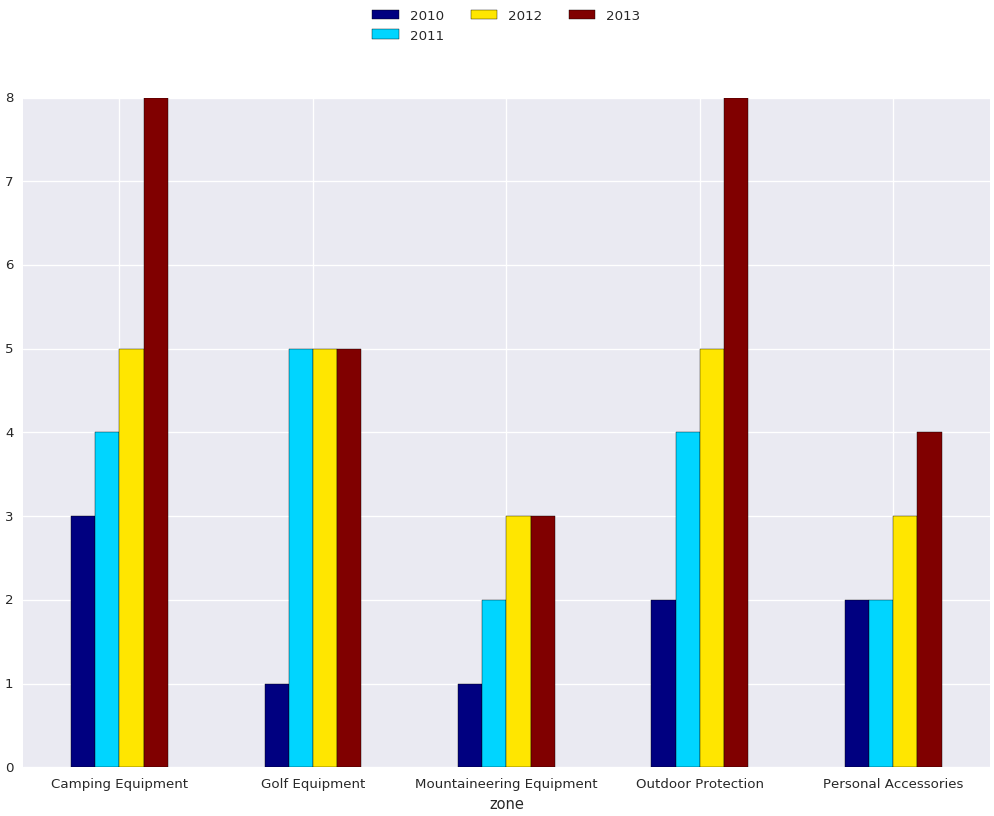

In [15]:
display(__dfFromScala)

# In this sample notebook, we have shown how easy it is to intersped Scala and Python in the same Notebook.
We encourage you to continue exploring this powerful functionality by using more complex Scala libraries